In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import pi

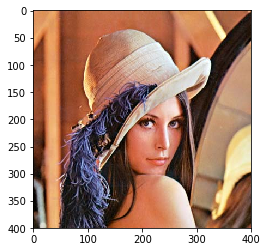

In [7]:
image = cv2.imread("Lenna.jpg")
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b]) 
plt.imshow(rgb_img)
plt.show()

In [3]:
def BGR_TO_HSI(img):

  with np.errstate(divide='ignore', invalid='ignore'):

    bgr = np.int32(cv2.split(img))

    blue = bgr[0]
    green = bgr[1]
    red = bgr[2]

    intensity = np.divide(blue + green + red, 3)

    minimum = np.minimum(np.minimum(red, green), blue)
    saturation = 1 - 3 * np.divide(minimum, red + green + blue)

    sqrt_calc = np.sqrt(((red - green) * (red - green)) + ((red - blue) * (green - blue)))

    if (green >= blue).any():
      hue = np.arccos((1/2 * ((red-green) + (red - blue)) / sqrt_calc))
    else:
      hue = 2*pi - np.arccos((1/2 * ((red-green) + (red - blue)) / sqrt_calc))

    hue = hue*180/pi

    hsi = cv2.merge((hue, saturation, intensity))
    return hsi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


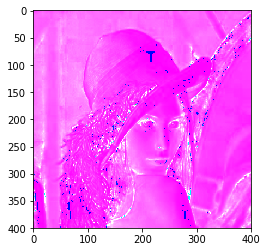

In [8]:
hsi_img = BGR_TO_HSI(image)
plt.imshow(hsi_img)
plt.show()